In [219]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm   

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 

In [109]:
df=pd.read_csv("sample_data.csv")
df.head()


,session id,uuid,timestamp,location,location path,location query,referral location,ua_string,geo_ip
0,3efae056-7cd2-4e89-9820-a1b938cbb746,9567f0c2-d71e-4ba3-afdc-d46e37894fb4,09/07/17 10:43,www.acmeservices.com,/editing-services/research-paper-editing-and-proofreading-services.html,keyword=edit%20paper&matchtype=e&device=c&creative=201469956189&gclid=CMOHip-C_NQCFVJLDQod4RwGUA,www.google.com,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36",73.132.164.124
1,7039c571-4487-4d96-8013-4b4b70e66dc7,NaN,09/07/17 10:44,www.acmeservices.com,/editing-services/english-language-editing-and-proofreading-services.html,keyword=professional%20editing%20services&matchtype=e&device=c&creative=201469956228&gclid=CjwKEAjwqIfLBRCk6vH_rJq7yD0SJACG18frd6-0DE5ER7QnSxLUEXza0DteAJyCULJw1NLFBdXExxoC7Bfw_wcB,www.google.com,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36",100.35.108.133
2,5b31e12a-229f-4774-8dae-b7267d04cba2,9567f0c2-d71e-4ba3-afdc-d46e37894fb4,09/07/17 10:54,www.acmeservices.com,/editing-services/academic-editing-and-proofreading-services.html,keyword=academic%20proofreading&matchtype=p&device=c&creative=204838723656&gclid=CIXsrsyE_NQCFROHswodehQHkA,www.google.com,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36",73.132.164.124
3,f072cc36-105d-4c55-b5b0-3247243d9ddd,NaN,09/07/17 11:04,www.acmeservices.com,/editing-services/english-language-check-services.html,keyword=language%20editing%20service&matchtype=p&device=c&creative=201465365924&gclid=CjwKCAjwqIfLBRAkEiwAhtfH6_uus09gDdK39ITo102x-R_fZJahBcrgX-CaDOeSC5QejkZ1zwUFcxoCtOwQAvD_BwE,www.google.iq,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; rv:11.0) like Gecko,159.255.163.4
4,3fff8ecf-7ec1-4345-a132-5d150a0b0f8c,a01ef48d-8533-4c82-93e5-c3d7c7f04d07,09/07/17 12:08,www.acmeservices.com,/editing-services/english-language-editing-and-proofreading-services.html,keyword=language%20editing&matchtype=p&device=c&creative=201456839030&gclid=CjwKEAjwqIfLBRCk6vH_rJq7yD0SJACG18fraU0P5DXYVqOS9NqB-ast_axDF5vvlx8xSZi4pr-R6BoCxXPw_wcB,www.google.dk,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36",2.110.98.148


In [110]:
df['location query'].value_counts()

a=main                                                                                                                                                                                                                                                                                                                                                                                                35
utm_source=360&utm_medium=ppc&utm_term=pingpai&utm_content=pingpaici&utm_campaign=pingpaici-xing                                                                                                                                                                                                                                                                                                      11
=Exact%20brand%20keyword%20(City)&=Yi%20de%20ji&=%E6%84%8F%E5%BE%97%E8%BE%91&e_creative=16293135591&e_keywordid=62327781225                                                                                           

In [12]:
df.shape

(400, 9)

In [13]:
df.isnull().sum()

session id            1
uuid                 38
timestamp             0
location              0
location path         0
location query        0
referral location    64
ua_string             0
geo_ip                0
dtype: int64

In [111]:
#cleaning 
df=df.dropna(thresh=8)       #that is almost all columns are empty so drop those rows entirely
df.shape

(393, 9)

In [19]:
df.isnull().sum()

session id            0
uuid                 32
timestamp             0
location              0
location path         0
location query        0
referral location    57
ua_string             0
geo_ip                0
dtype: int64

I will not be solving for empty uuid cos it is a unique id and it wnt had much relevance to the info so I will not work on imputing it 

In [538]:
df['referral location'].value_counts().head()

www.google.co.jp    74
www.baidu.com       50
search.naver.com    41
www.google.com      24
www.so.com          19
Name: referral location, dtype: int64

This referal location is important and if that is nt provided we cant go ahead with it so I will prefer removing it instead of replacing it with another value , cos if there is any error in this entered value the analysis can be affected


In [ ]:
#57/393

In [112]:
df=df.drop(columns=['session id','uuid'])

In [113]:
df = df[pd.notnull(df['referral location'])]
df.shape

(336, 7)

In [114]:
#feature engineering 
df['parentsite'] = df['referral location']

In [539]:
df['referral location'].value_counts().head()

www.google.co.jp    74
www.baidu.com       50
search.naver.com    41
www.google.com      24
www.so.com          19
Name: referral location, dtype: int64

Feature Engineering

In [77]:
dfp=[]
for i in df['parentsite'] :
    
    j=i.replace("www.", "")
    j=j.replace(".com", "")
    if "google" in j:      #cos there seem to be many extensions to the same 
        j='google'
   # print(j)
    dfp.append(j)

#print(dfp)
df['parentsite']=dfp
#print(df['parentsite'])
df['parentsite'].value_counts()

#  

google                  193
baidu                    50
search.naver             41
so                       19
display.ad.daum.net       6
mail.126                  3
cpro.baidu                3
sogou                     3
bzclk.baidu               2
lm.facebook               2
mail.163                  2
bing                      2
dp.g.doubleclick.net      2
cas.hk.as.criteo          1
msn                       1
kps.or.kr                 1
ad.search.naver           1
blog.sciencenet.cn        1
search.daum.net           1
paid.outbrain             1
m.baidu                   1
Name: parentsite, dtype: int64

In [116]:
pd.set_option('display.max_colwidth', -1)
df['location query'].head()

0    keyword=edit%20paper&matchtype=e&device=c&creative=201469956189&gclid=CMOHip-C_NQCFVJLDQod4RwGUA                                                                                   
1    keyword=professional%20editing%20services&matchtype=e&device=c&creative=201469956228&gclid=CjwKEAjwqIfLBRCk6vH_rJq7yD0SJACG18frd6-0DE5ER7QnSxLUEXza0DteAJyCULJw1NLFBdXExxoC7Bfw_wcB
2    keyword=academic%20proofreading&matchtype=p&device=c&creative=204838723656&gclid=CIXsrsyE_NQCFROHswodehQHkA                                                                        
3    keyword=language%20editing%20service&matchtype=p&device=c&creative=201465365924&gclid=CjwKCAjwqIfLBRAkEiwAhtfH6_uus09gDdK39ITo102x-R_fZJahBcrgX-CaDOeSC5QejkZ1zwUFcxoCtOwQAvD_BwE  
4    keyword=language%20editing&matchtype=p&device=c&creative=201456839030&gclid=CjwKEAjwqIfLBRCk6vH_rJq7yD0SJACG18fraU0P5DXYVqOS9NqB-ast_axDF5vvlx8xSZi4pr-R6BoCxXPw_wcB               
Name: location query, dtype: object

In [118]:
df1=df.copy()

In [205]:
df['location query']=df1['location query']

In [206]:
#decoding and encoding 
from urllib.parse import quote, unquote
a=[]
for url in df['location query']:
    url = unquote(url)
    #print(url)
    a.append(url)
#print(a)


In [194]:
print(df1['location query'].shape)
len(a)

(336,)


336

In [207]:
df['location query']=a

In [196]:
df['location query'].head()

0    keyword=edit paper&matchtype=e&device=c&creative=201469956189&gclid=CMOHip-C_NQCFVJLDQod4RwGUA                                                                                 
1    keyword=professional editing services&matchtype=e&device=c&creative=201469956228&gclid=CjwKEAjwqIfLBRCk6vH_rJq7yD0SJACG18frd6-0DE5ER7QnSxLUEXza0DteAJyCULJw1NLFBdXExxoC7Bfw_wcB
2    keyword=academic proofreading&matchtype=p&device=c&creative=204838723656&gclid=CIXsrsyE_NQCFROHswodehQHkA                                                                      
3    keyword=language editing service&matchtype=p&device=c&creative=201465365924&gclid=CjwKCAjwqIfLBRAkEiwAhtfH6_uus09gDdK39ITo102x-R_fZJahBcrgX-CaDOeSC5QejkZ1zwUFcxoCtOwQAvD_BwE  
4    keyword=language editing&matchtype=p&device=c&creative=201456839030&gclid=CjwKEAjwqIfLBRCk6vH_rJq7yD0SJACG18fraU0P5DXYVqOS9NqB-ast_axDF5vvlx8xSZi4pr-R6BoCxXPw_wcB             
Name: location query, dtype: object

In [197]:
df['location query'].head()

0    keyword=edit paper&matchtype=e&device=c&creative=201469956189&gclid=CMOHip-C_NQCFVJLDQod4RwGUA                                                                                 
1    keyword=professional editing services&matchtype=e&device=c&creative=201469956228&gclid=CjwKEAjwqIfLBRCk6vH_rJq7yD0SJACG18frd6-0DE5ER7QnSxLUEXza0DteAJyCULJw1NLFBdXExxoC7Bfw_wcB
2    keyword=academic proofreading&matchtype=p&device=c&creative=204838723656&gclid=CIXsrsyE_NQCFROHswodehQHkA                                                                      
3    keyword=language editing service&matchtype=p&device=c&creative=201465365924&gclid=CjwKCAjwqIfLBRAkEiwAhtfH6_uus09gDdK39ITo102x-R_fZJahBcrgX-CaDOeSC5QejkZ1zwUFcxoCtOwQAvD_BwE  
4    keyword=language editing&matchtype=p&device=c&creative=201456839030&gclid=CjwKEAjwqIfLBRCk6vH_rJq7yD0SJACG18fraU0P5DXYVqOS9NqB-ast_axDF5vvlx8xSZi4pr-R6BoCxXPw_wcB             
Name: location query, dtype: object

In [209]:
aps=[]
for i in df['location query']:
    i=re.sub('%20','&', i)
    print(i)
    aps.append(i)
print(aps)
print(len(aps))
df['location query']=aps    
#found=df['location query'][df['location query'].str.contains('%20')]
#idx = df['location query'].index[df['location query'].str.contains('%20')]
#for i in df['location query']:
 #    re.sub('%20','&', i) 

#print(found.count())
#print(idx)    

keyword=edit paper&matchtype=e&device=c&creative=201469956189&gclid=CMOHip-C_NQCFVJLDQod4RwGUA
keyword=professional editing services&matchtype=e&device=c&creative=201469956228&gclid=CjwKEAjwqIfLBRCk6vH_rJq7yD0SJACG18frd6-0DE5ER7QnSxLUEXza0DteAJyCULJw1NLFBdXExxoC7Bfw_wcB
keyword=academic proofreading&matchtype=p&device=c&creative=204838723656&gclid=CIXsrsyE_NQCFROHswodehQHkA
keyword=language editing service&matchtype=p&device=c&creative=201465365924&gclid=CjwKCAjwqIfLBRAkEiwAhtfH6_uus09gDdK39ITo102x-R_fZJahBcrgX-CaDOeSC5QejkZ1zwUFcxoCtOwQAvD_BwE
keyword=language editing&matchtype=p&device=c&creative=201456839030&gclid=CjwKEAjwqIfLBRCk6vH_rJq7yD0SJACG18fraU0P5DXYVqOS9NqB-ast_axDF5vvlx8xSZi4pr-R6BoCxXPw_wcB
keyword=english editing&matchtype=e&device=c&creative=201469955973&gclid=CM-f6LWV_NQCFUWIjwodCbcJkQ
keyword=language editing&matchtype=e&device=c&creative=201469956195&gclid=CITn-cOh_NQCFdOHaAodMO8EdA
keyword=proofread service&matchtype=e&device=c&creative=201469955712&gclid=CjwKEAjwqI

In [239]:
myString="108    =SCI Paper-new&=SCI paper touching up&=sci 润色&e_creative=422862382&e_keywordid=2929236097"

mySubString=myString[myString.find("=")+1:myString.find("&")]
print (mySubString)

SCI Paper-new


In [245]:
df=df.drop(columns=['keyword'])

In [319]:
key=[]
creat=[]
adgroup=[]
media=[]
for myString in df['location query']:
    keyword=myString[myString.find("=")+1:myString.find("&")]
    
    
    key.append(keyword)
    
    creative=myString[myString.find("creative=")+1:myString.find("&")]
   
    creat.append(creative)
    
    nmedia=myString[myString.find("nmedia=")+1:myString.find("&")]
    media.append(nmedia)
    
    nadr=myString[myString.find("n_ad_group=")+1:myString.find("&")]
    adgroup.append(nadr)
#print(media)
    #print(creative)
    
df['creat']=creat
df['keyword']=key
df['media']=media
df['adgroup']=adgroup



In [297]:
#practice 
for myString in df['location query']:
    #found=df['location query'][df['location query'].str.contains('media')]
#print(len(found))
    found=df['location query'][df['location query'].str.contains('n_ad_group=')]
    #print(found)
print(len(found))    
    #nmedia=myString[myString.find("n_media=")+1:myString.find("&")]
    #media.append(nmedia)
    #print(media)
    

300    n_media=27758&n_query=논문영문교정&n_rank=2&n_ad_group=grp-a001-01-000000000904743&n_ad=nad-a001-01-000000012542618&n_keyword_id=nkw-a001-01-000000155529249&n_keyword=논문영문교정&n_campaign_type=1&NaPm=ct=j52cbb7s|ci=0yC00035jArnGGCy8uIe|tr=sa|hk=6fd561c8ec85bada5f331d98d37fe78f8dd002d1            
310    n_media=122875&n_query=논문초록번역&n_rank=2&n_ad_group=grp-m001-01-000001066709242&n_ad=nad-a001-01-000000015620286&n_keyword_id=nkw-m001-01-000000780245324&n_keyword=논문초록번역&n_campaign_type=1&NaPm=ct=j52jlygo|ci=0yK0002xvArnHok6G0LZ|tr=sa|hk=91e723b648268a4ea0bc7af19d412b6cffe9924b           
311    n_media=27758&n_query=의학영어번역&n_rank=2&n_ad_group=grp-a001-01-000000000904793&n_ad=nad-a001-01-000000010550324&n_keyword_id=nkw-a001-01-000000155528704&n_keyword=의학영어번역&n_campaign_type=1&NaPm=ct=j52k0eiw|ci=0yK00015wkrngy97FKLe|tr=sa|hk=003c4d6bb4ab472229d5dd5025fac9840aaff863            
329    n_media=27758&n_query=국제저널&n_rank=1&n_ad_group=grp-a001-01-000000000928996&n_ad=nad-a001-01-0000000099488

Name: location query, dtype: object
300    n_media=27758&n_query=논문영문교정&n_rank=2&n_ad_group=grp-a001-01-000000000904743&n_ad=nad-a001-01-000000012542618&n_keyword_id=nkw-a001-01-000000155529249&n_keyword=논문영문교정&n_campaign_type=1&NaPm=ct=j52cbb7s|ci=0yC00035jArnGGCy8uIe|tr=sa|hk=6fd561c8ec85bada5f331d98d37fe78f8dd002d1            
310    n_media=122875&n_query=논문초록번역&n_rank=2&n_ad_group=grp-m001-01-000001066709242&n_ad=nad-a001-01-000000015620286&n_keyword_id=nkw-m001-01-000000780245324&n_keyword=논문초록번역&n_campaign_type=1&NaPm=ct=j52jlygo|ci=0yK0002xvArnHok6G0LZ|tr=sa|hk=91e723b648268a4ea0bc7af19d412b6cffe9924b           
311    n_media=27758&n_query=의학영어번역&n_rank=2&n_ad_group=grp-a001-01-000000000904793&n_ad=nad-a001-01-000000010550324&n_keyword_id=nkw-a001-01-000000155528704&n_keyword=의학영어번역&n_campaign_type=1&NaPm=ct=j52k0eiw|ci=0yK00015wkrngy97FKLe|tr=sa|hk=003c4d6bb4ab472229d5dd5025fac9840aaff863            
329    n_media=27758&n_query=국제저널&n_rank=1&n_ad_group=grp-a001-01-0000000009

Name: location query, dtype: object
300    n_media=27758&n_query=논문영문교정&n_rank=2&n_ad_group=grp-a001-01-000000000904743&n_ad=nad-a001-01-000000012542618&n_keyword_id=nkw-a001-01-000000155529249&n_keyword=논문영문교정&n_campaign_type=1&NaPm=ct=j52cbb7s|ci=0yC00035jArnGGCy8uIe|tr=sa|hk=6fd561c8ec85bada5f331d98d37fe78f8dd002d1            
310    n_media=122875&n_query=논문초록번역&n_rank=2&n_ad_group=grp-m001-01-000001066709242&n_ad=nad-a001-01-000000015620286&n_keyword_id=nkw-m001-01-000000780245324&n_keyword=논문초록번역&n_campaign_type=1&NaPm=ct=j52jlygo|ci=0yK0002xvArnHok6G0LZ|tr=sa|hk=91e723b648268a4ea0bc7af19d412b6cffe9924b           
311    n_media=27758&n_query=의학영어번역&n_rank=2&n_ad_group=grp-a001-01-000000000904793&n_ad=nad-a001-01-000000010550324&n_keyword_id=nkw-a001-01-000000155528704&n_keyword=의학영어번역&n_campaign_type=1&NaPm=ct=j52k0eiw|ci=0yK00015wkrngy97FKLe|tr=sa|hk=003c4d6bb4ab472229d5dd5025fac9840aaff863            
329    n_media=27758&n_query=국제저널&n_rank=1&n_ad_group=grp-a001-01-0000000009

Name: location query, dtype: object
300    n_media=27758&n_query=논문영문교정&n_rank=2&n_ad_group=grp-a001-01-000000000904743&n_ad=nad-a001-01-000000012542618&n_keyword_id=nkw-a001-01-000000155529249&n_keyword=논문영문교정&n_campaign_type=1&NaPm=ct=j52cbb7s|ci=0yC00035jArnGGCy8uIe|tr=sa|hk=6fd561c8ec85bada5f331d98d37fe78f8dd002d1            
310    n_media=122875&n_query=논문초록번역&n_rank=2&n_ad_group=grp-m001-01-000001066709242&n_ad=nad-a001-01-000000015620286&n_keyword_id=nkw-m001-01-000000780245324&n_keyword=논문초록번역&n_campaign_type=1&NaPm=ct=j52jlygo|ci=0yK0002xvArnHok6G0LZ|tr=sa|hk=91e723b648268a4ea0bc7af19d412b6cffe9924b           
311    n_media=27758&n_query=의학영어번역&n_rank=2&n_ad_group=grp-a001-01-000000000904793&n_ad=nad-a001-01-000000010550324&n_keyword_id=nkw-a001-01-000000155528704&n_keyword=의학영어번역&n_campaign_type=1&NaPm=ct=j52k0eiw|ci=0yK00015wkrngy97FKLe|tr=sa|hk=003c4d6bb4ab472229d5dd5025fac9840aaff863            
329    n_media=27758&n_query=국제저널&n_rank=1&n_ad_group=grp-a001-01-0000000009

In [279]:
mystring='n_media=27758&n_query=논문영문교정&n_rank=2&n_ad_group=grp-a001-01-000000000904743&n_ad=nad-a001-01-000000012542618&n_keyword_id=nkw-a001-01-000000155529249&n_keyword=논문영문교정&n_campaign_type=1&NaPm=ct=j52cbb7s|ci=0yC00035jArnGGCy8uIe|tr=sa|hk=6fd561c8ec85bada5f331d98d37fe78f8dd002d1'
nmedia=myString[myString.find("n_media=")+1:myString.find("&")]
print(nmedia)

_media=27758


In [303]:
df.head()

,timestamp,location,location path,location query,referral location,ua_string,geo_ip,parentsite,creat,keyword,media,adgroup
0,09/07/17 10:43,www.acmeservices.com,/editing-services/research-paper-editing-and-proofreading-services.html,keyword=edit paper&matchtype=e&device=c&creative=201469956189&gclid=CMOHip-C_NQCFVJLDQod4RwGUA,www.google.com,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36",73.132.164.124,www.google.com,,edit paper,keyword=edit paper,keyword=edit paper
1,09/07/17 10:44,www.acmeservices.com,/editing-services/english-language-editing-and-proofreading-services.html,keyword=professional editing services&matchtype=e&device=c&creative=201469956228&gclid=CjwKEAjwqIfLBRCk6vH_rJq7yD0SJACG18frd6-0DE5ER7QnSxLUEXza0DteAJyCULJw1NLFBdXExxoC7Bfw_wcB,www.google.com,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36",100.35.108.133,www.google.com,,professional editing services,keyword=professional editing services,keyword=professional editing services
2,09/07/17 10:54,www.acmeservices.com,/editing-services/academic-editing-and-proofreading-services.html,keyword=academic proofreading&matchtype=p&device=c&creative=204838723656&gclid=CIXsrsyE_NQCFROHswodehQHkA,www.google.com,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36",73.132.164.124,www.google.com,,academic proofreading,keyword=academic proofreading,keyword=academic proofreading
3,09/07/17 11:04,www.acmeservices.com,/editing-services/english-language-check-services.html,keyword=language editing service&matchtype=p&device=c&creative=201465365924&gclid=CjwKCAjwqIfLBRAkEiwAhtfH6_uus09gDdK39ITo102x-R_fZJahBcrgX-CaDOeSC5QejkZ1zwUFcxoCtOwQAvD_BwE,www.google.iq,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; rv:11.0) like Gecko,159.255.163.4,www.google.iq,,language editing service,keyword=language editing service,keyword=language editing service
4,09/07/17 12:08,www.acmeservices.com,/editing-services/english-language-editing-and-proofreading-services.html,keyword=language editing&matchtype=p&device=c&creative=201456839030&gclid=CjwKEAjwqIfLBRCk6vH_rJq7yD0SJACG18fraU0P5DXYVqOS9NqB-ast_axDF5vvlx8xSZi4pr-R6BoCxXPw_wcB,www.google.dk,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36",2.110.98.148,www.google.dk,,language editing,keyword=language editing,keyword=language editing


In [220]:
#=SCI Paper-new
found=df['location query'][df['location query'].str.contains('=SCI Paper-new')]
print(found)

108    =SCI Paper-new&=SCI paper touching up&=sci 润色&e_creative=422862382&e_keywordid=2929236097
Name: location query, dtype: object


In [223]:
df.isnull().sum()
df.shape

(336, 8)

In [328]:
df['keyword'] = df['keyword'].str.replace('+', '')
df.head()
df['keyword'].unique()


array(['edit paper', 'professional editing services',
       'academic proofreading', 'language editing service',
       'language editing', 'english editing', 'proofread service',
       'proofreading thesis', 'scientific editing', 'social',
       'professional', 'editing service', 'english editing service',
       'proofreading professional', 'dissertation editing',
       'editing services', 'acmeservices', 'paper editing',
       'proofreading service', 'thesis proofreading',
       'research paper editing', 'thesis proofreading services',
       'korean to english translation', 'japanese to english translation',
       'chinese to english translation', 'journal submission manuscript',
       'arabic', '360', 'Publication-new', 'Level 2', 'SCI Paper-new',
       'metered', 'baid', 'Brand', 'Revising-new', 'Level 1',
       '2015-SCI Polishing', 'Exact brand keyword (City)', 'sougou',
       'Focus keywords', 'baidu', 'Newsletter', 'Sougou', 'Baidu',
       'baidu-runs', '2015-acme

In [330]:
df['keyword'].value_counts().head(10)

acmeservices                  88
mai                           26
360                           19
27758                         13
editing service               12
english editing               9 
에디티지                          8 
Level 2                       7 
Exact brand keyword (City)    7 
metered                       7 
Name: keyword, dtype: int64

Top 10 keywords 

In [373]:
n = 10
popular=df['keyword'].value_counts()[:n].index.tolist()
print('the top 10 keywords are',popular)
print(type(popular))


the top 10 keywords are ['acmeservices', 'mai', '360', '27758', 'editing service', 'english editing', '에디티지', 'Level 2', 'Exact brand keyword (City)', 'metered']
<class 'list'>


In [388]:
df2['keyword'] = pd.DataFrame(popular) 
df2=df2.drop(columns=[0])
df2.columns

Index(['keyword'], dtype='object')

Dataframe with popular keywords


In [389]:
df2['keyword']             

0    acmeservices              
1    mai                       
2    360                       
3    27758                     
4    editing service           
5    english editing           
6    에디티지                      
7    Level 2                   
8    Exact brand keyword (City)
9    metered                   
Name: keyword, dtype: object

In [391]:
#Q2
df.head()

,timestamp,location,location path,location query,referral location,ua_string,geo_ip,parentsite,creat,keyword,media,adgroup
0,09/07/17 10:43,www.acmeservices.com,/editing-services/research-paper-editing-and-proofreading-services.html,keyword=edit paper&matchtype=e&device=c&creative=201469956189&gclid=CMOHip-C_NQCFVJLDQod4RwGUA,www.google.com,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36",73.132.164.124,www.google.com,,edit paper,keyword=edit paper,keyword=edit paper
1,09/07/17 10:44,www.acmeservices.com,/editing-services/english-language-editing-and-proofreading-services.html,keyword=professional editing services&matchtype=e&device=c&creative=201469956228&gclid=CjwKEAjwqIfLBRCk6vH_rJq7yD0SJACG18frd6-0DE5ER7QnSxLUEXza0DteAJyCULJw1NLFBdXExxoC7Bfw_wcB,www.google.com,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36",100.35.108.133,www.google.com,,professional editing services,keyword=professional editing services,keyword=professional editing services
2,09/07/17 10:54,www.acmeservices.com,/editing-services/academic-editing-and-proofreading-services.html,keyword=academic proofreading&matchtype=p&device=c&creative=204838723656&gclid=CIXsrsyE_NQCFROHswodehQHkA,www.google.com,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36",73.132.164.124,www.google.com,,academic proofreading,keyword=academic proofreading,keyword=academic proofreading
3,09/07/17 11:04,www.acmeservices.com,/editing-services/english-language-check-services.html,keyword=language editing service&matchtype=p&device=c&creative=201465365924&gclid=CjwKCAjwqIfLBRAkEiwAhtfH6_uus09gDdK39ITo102x-R_fZJahBcrgX-CaDOeSC5QejkZ1zwUFcxoCtOwQAvD_BwE,www.google.iq,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; rv:11.0) like Gecko,159.255.163.4,www.google.iq,,language editing service,keyword=language editing service,keyword=language editing service
4,09/07/17 12:08,www.acmeservices.com,/editing-services/english-language-editing-and-proofreading-services.html,keyword=language editing&matchtype=p&device=c&creative=201456839030&gclid=CjwKEAjwqIfLBRCk6vH_rJq7yD0SJACG18fraU0P5DXYVqOS9NqB-ast_axDF5vvlx8xSZi4pr-R6BoCxXPw_wcB,www.google.dk,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36",2.110.98.148,www.google.dk,,language editing,keyword=language editing,keyword=language editing


In [406]:
#df['ua_string']
#br=[]
#o=[]
#d=[]
#for a in df['ua_string']:
 #   words=a.split(" ")
  #  br.append(words[0])
   # o.append(words[1])
    #d.append(words[2])
#df['browser']=br
#df['OS']=o
#df['dev']=d

In [407]:
#df['browser'].unique()
#df['OS'].unique()
#df['dev'].unique()

array(['NT', 'Android', 'CrOS', 'Intel', 'Linux', 'MSIE', ''],
      dtype=object)

In [405]:
#df['ua_string'].unique()

array(['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36',
       'Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; rv:11.0) like Gecko',
       'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36',
       'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.109 Safari/537.36',
       'Mozilla/5.0 (Windows NT 6.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.112 Safari/537.36',
       'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36',
       'Mozilla/5.0 (Linux; Android 7.0; SM-G935F Build/NRD90M) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.125 Mobile Safari/537.36',
       'Mozilla/5.0 (Linux; Android 5.1; A1601 Build/LMY47I) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.125 Mobile Safari/537.36',
       'Mozilla/5.0 

In [408]:
#df['device'] = df['dev'].apply(lambda x: 'Mobile' if x == 'Android'else 'Co')

In [410]:
#df['device'].unique()

array(['Computer', 'Mobile'], dtype=object)

In [422]:
from user_agents import parse
# iPhone's user agent string
ai=[]
for u in df['ua_string']:
    
    3#a_string = 'Mozilla/5.0 (iPhone; CPU iPhone OS 5_1 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9B179 Safari/7534.48.3'
    ua = parse(u)

# Accessing user agent's browser attributes
    ua.browser  # returns Browser(family=u'Mobile Safari', version=(5, 1), version_string='5.1')
    ua.browser.family  # returns 'Mobile Safari'
    ua.browser.version  # returns (5, 1)
    ua.browser.version_string   # returns '5.1'
    #print(ua.browser)
# Accessing user agent's operating system properties
    ua.os  # returns OperatingSystem(family=u'iOS', version=(5, 1), version_string='5.1')
    ua.os.family  # returns 'iOS'
    ua.os.version  # returns (5, 1)
    ua.os.version_string  # returns '5.1'

# Accessing user agent's device properties
    ua.device  # returns Device(family=u'iPhone', brand=u'Apple', model=u'iPhone')
    ua.device.family  # returns 'iPhone'
    ua.device.brand # returns 'Apple'
    ua.device.model # returns 'iPhone'

# Viewing a pretty string version
    a=str(ua) # returns "iPhone / iOS 5.1 / Mobile Safari 5.1"
    ai.append(a)

In [426]:
dfua=pd.DataFrame(ai)

In [428]:
dfua.head()

,0
0,PC / Windows 10 / Chrome 59.0.3071
1,PC / Windows 10 / Chrome 59.0.3071
2,PC / Windows 10 / Chrome 59.0.3071
3,PC / Windows 8.1 / IE 11.0
4,PC / Windows 10 / Chrome 59.0.3071


In [435]:
dfua= dfua[0].str.split("/", expand = True) 

In [438]:
dfua.head()

,Device,OS,Browser
0,PC,Windows 10,Chrome 59.0.3071
1,PC,Windows 10,Chrome 59.0.3071
2,PC,Windows 10,Chrome 59.0.3071
3,PC,Windows 8.1,IE 11.0
4,PC,Windows 10,Chrome 59.0.3071


In [437]:
dfua.columns = ['Device', 'OS','Browser']

In [442]:
dfua['Browser'].unique()

array([' Chrome 59.0.3071', ' IE 11.0', ' Chrome 49.0.2623',
       ' Chrome Mobile 59.0.3071', ' Firefox 54.0',
       ' Chrome Mobile 54.0.2840', ' Chrome 43.0.2357', ' Firefox 42.0',
       ' Chrome 60.0.3112', ' Chrome 56.0.2924', ' Opera 46.0.2597',
       ' Chrome 58.0.3029', ' Chrome Mobile 50.0.2661',
       ' Chrome Mobile 55.0.2883', ' Firefox 53.0', ' Edge 15.15063',
       ' Chrome 50.0.2661', ' UC Browser 6.1.2716', ' Chrome 55.0.2883',
       ' Chrome 45.0.2454', ' Chrome Mobile 33.0.0', ' Chrome 42.0.2311',
       ' Chrome Mobile WebView 42.0.2311', ' Maxthon 5.0.4',
       ' Sogou Explorer 1.0', ' Chrome 47.0.2526', ' Chrome 31.0.1650',
       ' QQ Browser 9.6.11681', ' Chrome 52.0.2743', ' Edge 14.14393',
       ' Firefox 48.0', ' Chrome 54.0.2840', ' Chrome 57.0.2987',
       ' Chrome Mobile 30.0.0', ' Chrome Mobile WebView 56.0.2924',
       ' QQ Browser 9.6.11372', ' Edge 12.10240',
       ' Chrome Mobile WebView 59.0.3071', ' IE 10.0', ' Firefox 47.0',
       ' Chr

In [446]:
dfua['Browser'].value_counts()

 Chrome 59.0.3071                   133
 IE 11.0                            57 
 Firefox 54.0                       24 
 Chrome 45.0.2454                   24 
 Chrome 50.0.2661                   16 
 Chrome Mobile 59.0.3071            10 
 Chrome 49.0.2623                   10 
 Chrome 55.0.2883                   5  
 Chrome 58.0.3029                   5  
 Sogou Explorer 1.0                 5  
 Edge 15.15063                      4  
 Chrome Mobile 30.0.0               4  
 Chrome 47.0.2526                   2  
 QQ Browser 9.6.11681               2  
 Chrome 52.0.2743                   2  
 IE 10.0                            2  
 Firefox 53.0                       2  
 Edge 14.14393                      2  
 Chrome 42.0.2311                   2  
 Chrome Mobile 33.0.0               2  
 Chrome Mobile 55.0.2883            2  
 Chrome 31.0.1650                   2  
 Chrome 56.0.2924                   1  
 Opera 46.0.2597                    1  
 Chrome 57.0.2987                   1  


In [452]:
dfua['Browser'].value_counts().head(10)

 Chrome 59.0.3071           133
 IE 11.0                    57 
 Firefox 54.0               24 
 Chrome 45.0.2454           24 
 Chrome 50.0.2661           16 
 Chrome Mobile 59.0.3071    10 
 Chrome 49.0.2623           10 
 Chrome 55.0.2883           5  
 Chrome 58.0.3029           5  
 Sogou Explorer 1.0         5  
Name: Browser, dtype: int64

#top 10 broswers

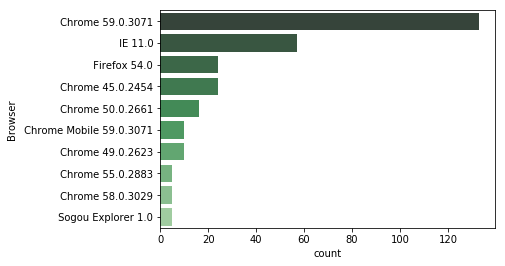

In [470]:
sns.countplot(y=dfua['Browser'],data=dfua, palette="Greens_d",
              order=dfua['Browser'].value_counts().iloc[:10].index)


In [ ]:
It is clear that these browser are pc specific and the max clicks are from there sites

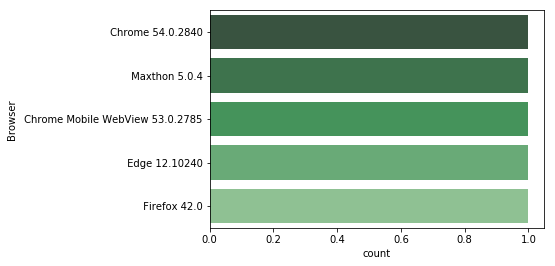

In [479]:
sns.countplot(y=dfua['Browser'],data=dfua, palette="Greens_d",
              order=dfua['Browser'].value_counts().iloc[-5:].index) 

#the above are the last five browsers that have clicks or direct to site so we have to have more adds and more attractive shemes that will lead to their clicks on our website 

In [474]:
dfua['Device'].value_counts()

PC                    311
Samsung SM-G935F      3  
Samsung SM-G906S      1  
Samsung SM-J111F      1  
Lenovo P1a42          1  
Pixel                 1  
M5                    1  
ST-PAD                1  
HTC Desire EYE        1  
Samsung SM-G920I      1  
Samsung SHV-E310S     1  
HUAWEI MLA-L11        1  
Samsung SHV-E250K     1  
LG-F320L              1  
Samsung SM-N920K      1  
Samsung SM-G920S      1  
T2-W01                1  
A1601                 1  
LG-F400L              1  
MHA-L29               1  
Samsung SM-A500K      1  
SO-01J                1  
Samsung SM-G720N0     1  
Samsung SM-G900FD     1  
Name: Device, dtype: int64

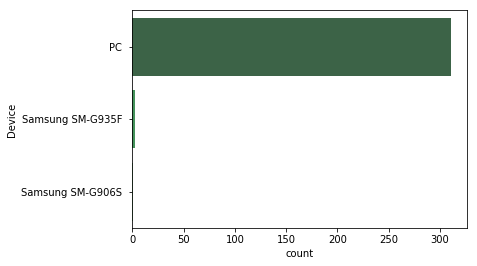

In [472]:
sns.countplot(y=dfua['Device'],data=dfua, palette="Greens_d",
              order=dfua['Device'].value_counts().iloc[:3].index)
#we can clearly see that major device are pc  So we have to work in order to improve their services as they are our priority 

In [483]:
#Q3
df['geo_ip'].head()


0    73.132.164.124
1    100.35.108.133
2    73.132.164.124
3    159.255.163.4 
4    2.110.98.148  
Name: geo_ip, dtype: object

In [524]:
data.get('location')

{'country': 'CN',
 'region': 'Henan',
 'city': 'Jiaozuo',
 'lat': 35.2397,
 'lng': 113.2331,
 'postalCode': '',
 'timezone': '+08:00',
 'geonameId': 1805987}

In [527]:
from simple_geoip import GeoIP
geoip = GeoIP("at_RyLkHfSRffCQmaxTgZuRByexbKFO2");
geo=[]
for i in df['geo_ip'] :
    try:
        data = geoip.lookup(i)
        
        a=data.get('location')
        geo.append(a)

    except ConnectionError:
        print('Not mentioned')
    # If you get here, it means you were unable to reach the geoipify
    # service, most likely because of a network error on your end.





In [529]:
df3=pd.DataFrame(geo)

In [530]:
df3.head()

,city,country,geonameId,lat,lng,postalCode,region,timezone
0,Bowie,US,4349159.0,38.94278,-76.73028,20715,Maryland,-04:00
1,Harrison,US,5098863.0,40.74450,-74.15080,07029,New Jersey,-04:00
2,Bowie,US,4349159.0,38.94278,-76.73028,20715,Maryland,-04:00
3,Erbil,IQ,95446.0,36.18330,44.01190,,Muhafazat Arbil,+03:00
4,Bronshoj,DK,2623322.0,55.70570,12.49640,2700,Capital Region,+02:00


In [532]:
df3['city'].value_counts().head()

Seoul      20
           17
Tokyo      9 
Beijing    9 
Busan      7 
Name: city, dtype: int64

#city from where there are max clicks

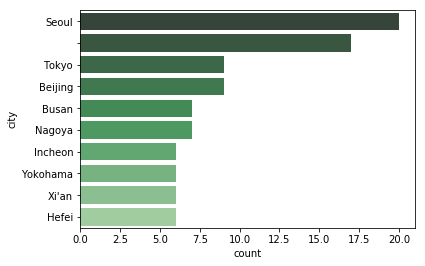

In [533]:
sns.countplot(y=df3['city'],data=df3, palette="Greens_d",
              order=df3['city'].value_counts().iloc[:10].index)

#country from whom we have  max click 


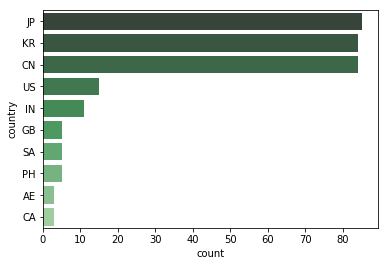

In [537]:
sns.countplot(y=df3['country'],data=df3, palette="Greens_d",
              order=df3['country'].value_counts().iloc[:10].index)